# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Public\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:58<00:00, 1875.60it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingre

In [19]:
#Project essay word count

essay_word_count = []

for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)
    
project_data["essay_word_count"] = essay_word_count

In [20]:
project_data['preprocessed_essays'] = preprocessed_essays

In [21]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

pos =[]
neg = []
neu = []
compound = []

for a in tqdm(project_data["preprocessed_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|██████████| 109248/109248 [12:36<00:00, 144.50it/s]


In [22]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [23]:
# similarly you can preprocess the titles also

# similarly you can preprocess the titles also

project_data.columns
#sent1= decontracted(project_data['project_title'].values[20000])
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 43985.78it/s]


In [24]:
#Project title word count
title_word_count = []

for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count


In [25]:
project_data['preprocessed_title'] = preprocessed_title

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_word_count',
       'preprocessed_essays', 'pos', 'neg', 'neu', 'compound',
       'title_word_count', 'preprocessed_title'],
      dtype='object')

In [27]:
Y=project_data['project_is_approved']

In [28]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [29]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data['preprocessed_title'] = preprocessed_title


In [30]:
column_values=['clean_categories', 'clean_subcategories', 'school_state', 'project_grade_category', 'teacher_prefix','preprocessed_essays','preprocessed_title' ,'price','quantity','teacher_number_of_previously_posted_projects','pos','neg','neu','compound','title_word_count','essay_word_count']

def select_columns(dataframe, column_names):
    new_frame = dataframe.loc[:, column_names]
    return new_frame

process_columns=select_columns(project_data,column_values)

process_columns.head()

clean_categories                 clean_subcategories school_state  \
0       Math_Science  AppliedSciences Health_LifeScience           CA   
1       SpecialNeeds                        SpecialNeeds           UT   
2  Literacy_Language                            Literacy           CA   
3    AppliedLearning                    EarlyDevelopment           GA   
4  Literacy_Language                            Literacy           WA   

  project_grade_category teacher_prefix  \
0          Grades PreK-2           Mrs.   
1             Grades 3-5            Ms.   
2          Grades PreK-2           Mrs.   
3          Grades PreK-2           Mrs.   
4             Grades 3-5           Mrs.   

                                 preprocessed_essays  \
0  i fortunate enough use fairy tale stem kits cl...   
1  imagine 8 9 years old you third grade classroo...   
2  having class 24 students comes diverse learner...   
3  i recently read article giving students choice...   
4  my students crave challenge eat obstacles brea...   

                                  preprocessed_title   price  quantity  \
0  my first graders eager learn world around they...  725.05         4   
1  my first graders eager learn world around they...  213.03         8   
2  my first graders eager learn world around they...  329.00         1   
3  my first graders eager learn world around they...  481.04         9   
4  my first graders eager learn world around they...   17.74        14   

   teacher_number_of_previously_posted_projects    pos    neg    neu  \
0                                            53  0.205  0.013  0.783   
1                                             4  0.248  0.072  0.680   
2                                            10  0.262  0.017  0.721   
3                                             2  0.187  0.030  0.783   
4                                             2  0.288  0.029  0.683   

   compound  title_word_count  essay_word_count  
0    0.9867                 6               285  
1    0.9897                 4               345  
2    0.9860                 7               177  
3    0.9524                 5               225  
4    0.9873                 7               184

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

In [31]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_categories= CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_categories.fit(process_columns['clean_categories'].values)

categories_one_hot = vectorizer_categories.transform(process_columns['clean_categories'].values)


print(vectorizer_categories.get_feature_names())

print("Shape of  matrix after one hot encodig ",categories_one_hot.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of  matrix after one hot encodig  (109248, 9)


In [32]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(process_columns['clean_subcategories'].values)

print(vectorizer_subcategories.get_feature_names())

sub_categories_one_hot = vectorizer_subcategories.transform(process_columns['clean_subcategories'].values)

print("Shape of  matrix after one hot encodig ",sub_categories_one_hot.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of  matrix after one hot encodig  (109248, 30)


In [33]:
# we use count vectorizer to convert the values of categorical data :school_state
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_schoolstate= CountVectorizer()
vectorizer_schoolstate.fit(process_columns['school_state'])

print(vectorizer_schoolstate.get_feature_names())

school_state_one_hot = vectorizer_schoolstate.transform(process_columns['school_state'].values)

print("Shape of  matrix after one hot encodig ",school_state_one_hot.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of  matrix after one hot encodig  (109248, 51)


In [34]:
#we use count vectorizer to convert the values of categorical data :project_grade_category
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_project_grade_category = CountVectorizer(stop_words=None)

k=process_columns['project_grade_category']


k.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)

vectorizer_project_grade_category.fit(k)

project_grade_category_one_hot=vectorizer_project_grade_category.transform(process_columns['project_grade_category'].values)

print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

Shape of matrix after one hot encodig  (109248, 4)


In [35]:
#we use count vectorizer to convert the values of categorical data : teacher_prefix
# getting error as we have null balues replacing them with 0
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_teacher_prefix = CountVectorizer()
project_data['teacher_prefix'].unique()

process_columns['teacher_prefix'].fillna("", inplace = True) 


vectorizer_teacher_prefix.fit(process_columns['teacher_prefix'].values)
print(vectorizer_teacher_prefix.get_feature_names())

teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(process_columns['teacher_prefix'].values)

print("Shape of  matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of  matrix after one hot encodig  (109248, 5)


- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [36]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(process_columns['preprocessed_essays'])

text_bow= vectorizer_bow_essay.transform(process_columns['preprocessed_essays'])

print("Shape of  matrix after one hot encodig ",text_bow.shape)

Shape of  matrix after one hot encodig  (109248, 16623)


In [37]:
# before you vectorize the title make sure you preprocess it
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(process_columns['preprocessed_title'])

title_bow = vectorizer_bow_title.transform(process_columns['preprocessed_title'])

print("Shape of matrix after one hot encodig title_bow",title_bow.shape)

Shape of matrix after one hot encodig title_bow (109248, 91)


### 1.5.3 Vectorizing Numerical features

In [38]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [39]:
#scaling of price feature

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(process_columns['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
price_standardized= price_scalar.transform(process_columns['price'].values.reshape(-1, 1))

print(price_standardized.shape)

(109248, 1)


In [40]:
#scaling of qunatity feature

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = Normalizer()
quantity_scalar.fit(process_columns['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
quantity_standardized= quantity_scalar.transform(process_columns['quantity'].values.reshape(-1, 1))

print(quantity_standardized.shape)

(109248, 1)


In [41]:
#scaling of teachers number of previously posted projects  

from sklearn.preprocessing import Normalizer

normalizer_projects_num = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer_projects_num.fit(process_columns['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects = normalizer_projects_num.transform(process_columns['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(prev_projects.shape)

(109248, 1)


In [42]:
# normalixing the title word count

from sklearn.preprocessing import Normalizer

normalizer_title_word = Normalizer()

normalizer_title_word.fit(process_columns['title_word_count'].values.reshape(-1,1))

title_word_count = normalizer_title_word.transform(process_columns['title_word_count'].values.reshape(-1,1))

print(title_word_count.shape)
print("="*100)

(109248, 1)


In [43]:
# normalixing the essay word count

from sklearn.preprocessing import Normalizer

normalizer_ess_count = Normalizer()

normalizer_ess_count.fit(process_columns['essay_word_count'].values.reshape(-1,1))

essay_word_count = normalizer_ess_count.transform(process_columns['essay_word_count'].values.reshape(-1,1))

print(essay_word_count.shape)

(109248, 1)


In [44]:
#normalizing the data for  essay sentiment-pos
from sklearn.preprocessing import Normalizer
normalizer_pos = Normalizer()

normalizer_pos.fit(process_columns['pos'].values.reshape(-1,1))

essay_sent_pos = normalizer_pos.transform(process_columns['pos'].values.reshape(-1,1))

print(essay_sent_pos.shape)

(109248, 1)


In [45]:
#normalizing the data for  essay sentiment-neg
from sklearn.preprocessing import Normalizer

normalizer_neg= Normalizer()

normalizer_neg.fit(process_columns['neg'].values.reshape(-1,1))

essay_sent_neg = normalizer_neg.transform(process_columns['neg'].values.reshape(-1,1))

print(essay_sent_neg.shape)

(109248, 1)


In [46]:
#normalizing the data for  essay sentiment-neu
from sklearn.preprocessing import Normalizer

normalizer_nue= Normalizer()

normalizer_nue.fit(process_columns['neu'].values.reshape(-1,1))

essay_sent_nue = normalizer_nue.transform(process_columns['neu'].values.reshape(-1,1))

print(essay_sent_nue.shape)

(109248, 1)


In [47]:
#normalizing the data for  essay sentiment-compound
from sklearn.preprocessing import Normalizer

normalizer_compound= Normalizer()

normalizer_compound.fit(process_columns['compound'].values.reshape(-1,1))

essay_sent_comp = normalizer_compound.transform(process_columns['compound'].values.reshape(-1,1))

print(essay_sent_comp.shape)
print("="*100)

(109248, 1)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [48]:
from scipy.sparse import hstack

#define categorical and numerical features
cat_num=hstack((school_state_one_hot,categories_one_hot,sub_categories_one_hot,teacher_prefix_one_hot,project_grade_category_one_hot,price_standardized, quantity_standardized, prev_projects, title_word_count, essay_word_count, essay_sent_pos, essay_sent_neg, essay_sent_nue, essay_sent_comp))

#combining categorical  numerical ,project_title(BOW)  and preprocessed_essay (BOW)
set1_train = hstack((cat_num, text_bow,title_bow))


In [90]:
#saving all the variables for future use

import pickle
f=open('10_variables.pckl','wb')
pickle.dump([set1_train],f)
f.close()

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

# considering only 10k points as im facing issues with laptop

In [49]:
set1_train.shape

(109248, 16822)

In [50]:
from sklearn.feature_selection import SelectKBest
feature= SelectKBest(k=5000)


In [51]:
X_all=feature.fit_transform(set1_train,Y)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning:

Features [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] are constant.



In [52]:
X_all.shape

(109248, 5000)

In [53]:
type(X_all)

scipy.sparse.csr.csr_matrix

In [54]:
x_vales=X_all.toarray()

In [56]:
type(x_vales)

numpy.ndarray

In [55]:
# taking 10k data points with random index
index = np.random.choice(x_vales.shape[0], 10000, replace=False)
x_vales_10k=x_vales[index,:]

In [68]:
# stroing essay vector for forming word cloud 
final_essay=process_columns['preprocessed_essays']

In [58]:
final_essay[index]

64390     my kindergarten students amazing children they...
85915     our classroom full 21 students eager excited l...
75243     this year i teaching sixth grade language arts...
66575     i loved school i student it goal students love...
87072     my school highest poverty area philadelphia mo...
2683      my students special needs i special education ...
8652      our school district serves 2500 total students...
9849      my students amazing group 45 children come poo...
66374     whatever good one abraham lincoln these words ...
12972     my students different areas within newport new...
22065     technology use technology common denominator s...
93386     our classroom working develop community strong...
92704     our school located pacoima impoverished city c...
42728     my students absolutely incredible i not think ...
91219     my students urban international some students ...
90101     my students 5th 8th graders read grade level t...
34624     this coming school year added 

In [59]:
x_vales_10k.shape

(10000, 5000)

In [91]:
import pickle
f=open('10_variables_x_vales_10k.pckl','wb')
pickle.dump([x_vales_10k],f)
f.close()

In [54]:
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/10_variables_x_vales_10k.pckl','rb')
x_vales_10k=pickle.load(f)
f.close()

In [57]:
type(x_vales_10k)

list

<h2>2.5 Apply Kmeans</h2>

In [61]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_vales_10k)
X_vectors = scalar.transform(x_vales_10k)
print("The shape of the X_vectors is : {}".format(X_vectors.shape))

The shape of the X_vectors is : (10000, 5000)


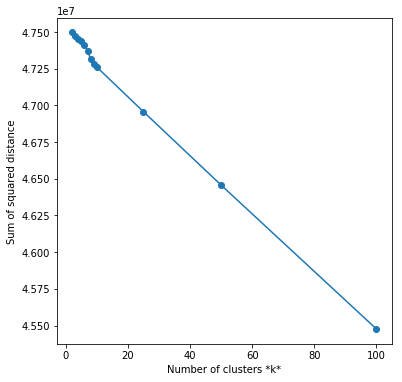

In [79]:
#Run the Kmeans algorithm and get the
from sklearn.cluster import KMeans, SpectralClustering
sse = []
list_k =[2,3,4,5,6,7,8,9,10,25,50,100]

for k in list_k:
    km = KMeans(n_clusters=k,random_state=42,n_jobs=-1,precompute_distances=True)
    km.fit(X_vectors)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

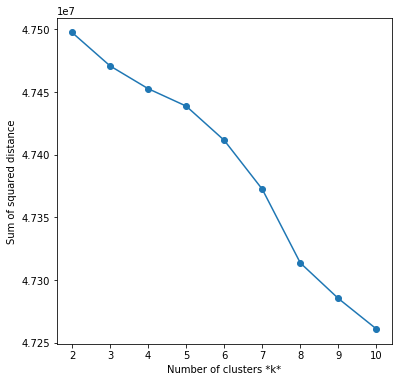

In [87]:
plt.figure(figsize=(6, 6))
plt.plot(list_k[0:9], sse[0:9], '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

#we consider 8 as the best value as we can inflection at that point and afterthat  MSE is decreasing faster than before that.

In [92]:
sse

[47497470.40167063,
 47470787.67710049,
 47452625.71695323,
 47438717.452127986,
 47411427.041385256,
 47372405.07624722,
 47313597.48231196,
 47285213.73695182,
 47260894.972364634,
 46957258.79223214,
 46457112.94989913,
 45476412.156416714]

In [89]:
optimal_k = 8
# Variable that will be used in the conclusion 
bow_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_jobs=-1,precompute_distances=True).fit(X_vectors)

In [106]:
# considering the essay text vector for forming the word cloud
essay_text = final_essay[index].values
# Getting all the reviews in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essay_text[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(essay_text[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(essay_text[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(essay_text[i])
    elif kmeans.labels_[i] == 4:
        cluster4.append(essay_text[i])
    elif kmeans.labels_[i] == 5:
        cluster5.append(essay_text[i])
    elif kmeans.labels_[i] == 6:
        cluster6.append(essay_text[i])
    elif kmeans.labels_[i] == 7:
        cluster7.append(essay_text[i])
    else :
        cluster8.append(essay_text[i]) 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))
print("\nNo. of reviews in Cluster-3 : ",len(cluster3))
print("\nNo. of reviews in Cluster-4 : ",len(cluster4))
print("\nNo. of reviews in Cluster-5 : ",len(cluster5))
print("\nNo. of reviews in Cluster-6 : ",len(cluster6))
print("\nNo. of reviews in Cluster-7 : ",len(cluster7))
print("\nNo. of reviews in Cluster-8 : ",len(cluster8))

No. of reviews in Cluster-1 :  1

No. of reviews in Cluster-2 :  73

No. of reviews in Cluster-3 :  1398

No. of reviews in Cluster-4 :  1717

No. of reviews in Cluster-5 :  1

No. of reviews in Cluster-6 :  6672

No. of reviews in Cluster-7 :  138

No. of reviews in Cluster-8 :  0


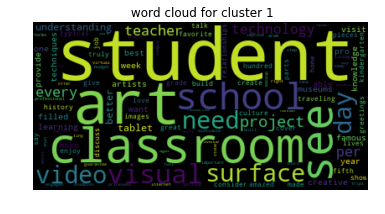

In [120]:
from wordcloud import WordCloud
essay_cluster=" ".join(essa for essa in cluster1)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1")
plt.show()

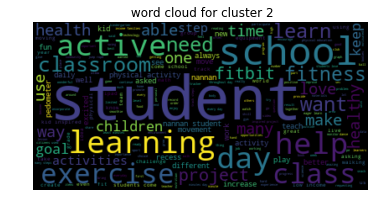

In [121]:
from wordcloud import WordCloud
essay_cluster2=" ".join(essa for essa in cluster2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2")
plt.show()

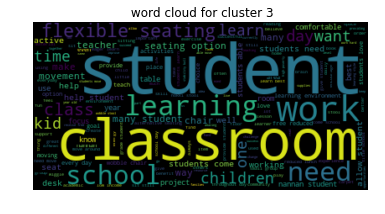

In [122]:
from wordcloud import WordCloud
essay_cluster3=" ".join(essa for essa in cluster3)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 3")
plt.show()

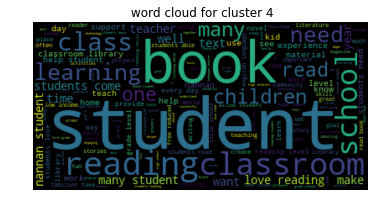

In [123]:
from wordcloud import WordCloud
essay_cluster4=" ".join(essa for essa in cluster4)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster4)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 4")
plt.show()

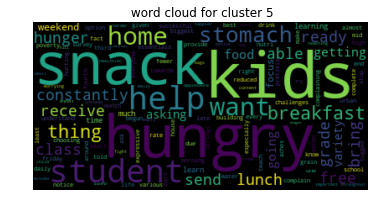

In [124]:
from wordcloud import WordCloud
essay_cluster5=" ".join(essa for essa in cluster5)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 5")
plt.show()

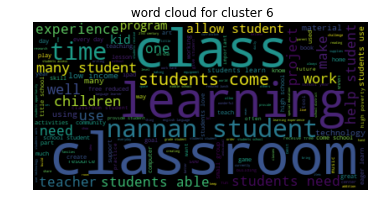

In [126]:
from wordcloud import WordCloud
essay_cluster6=" ".join(essa for essa in cluster6)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster6)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 6")
plt.show()

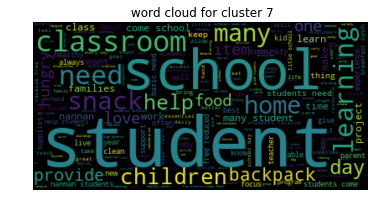

In [127]:
from wordcloud import WordCloud
essay_cluster7=" ".join(essa for essa in cluster7)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster7)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 7")
plt.show()

Inference:
From the graph between sum of squared errors and no of clusters ,we can get 8 as the optimal clusters from the elbow method.
we can observe that  maximum no of  points belong to cluster 6 with 6672 essays with almost constitute 66.72%

In cluster 1 we can see most frequent words like student ,Art,classroom ,need project  it means they mostly describe about the students and need for project funding.
In cluster 2 we can see most frequent words like student,learning,active,school,day which describes about the learning activities of the students.
In cluster 3 ,we can see the most frequent words like student,learning ,work ,classroom which indicates the essence of project funding for the schoool.
In cluster 4 ,we see most important words like book,student ,reading ,classroom etc from which we can conclude that it mainly describes about the activities of the student .
In cluster 5 we can see most frequent words like snacks,hungry,kids ,breakfast which constitues most of the essays and it gives information about the need of snacks for students ,One may draw that the students belong to lower primary .
In cluster 6 we can see most frequent words like classroom,class ,student which gives information about the necessary information about the stationary to the students.
In cluster 7 we can see most frequent words like student,school,children,backpack ,snacks which gives inforamtion about the student much needs.

we can infer from the graph that the sum of squared errors with 8 clusters is 47313597 which have only considered top 5000 features with 10k random points from the whole data.

Please note that the final model varies depending on the increase of data points taken.

## 2.6 Apply AgglomerativeClustering

# cluster 2

In [128]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2).fit(X_vectors)

essay_text = final_essay[index].values

# Getting all the reviews in different clusters
cluster1_AC2 = []
cluster2_AC2 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1_AC2.append(essay_text[i])
    else :
        cluster2_AC2.append(essay_text[i])
 
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1_AC2))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2_AC2))

No. of reviews in Cluster-1 :  9994

No. of reviews in Cluster-2 :  6


In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("cluster 2 Dendograms")  
dend = shc.dendrogram(shc.linkage(X_vectors, method='ward')) 

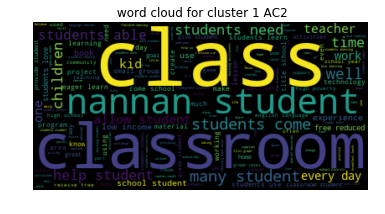

In [129]:
from wordcloud import WordCloud
essay_cluster1_ac2=" ".join(essa for essa in cluster1_AC2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster1_ac2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1 AC2")
plt.show()

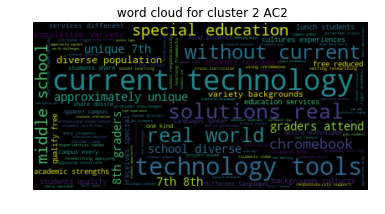

In [133]:
from wordcloud import WordCloud
essay_cluster2_ac2=" ".join(essa for essa in cluster2_AC2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2_ac2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2 AC2")
plt.show()

Inference:
We can see that when 2 clusters are considered , the maximum no of  points belong to cluser 1 with almost 99.96%.
in cluster 1 we can see most frequent words like class,student ,classroom ,nanan 
In cluster 2 we can see most frequent words like technology,tools ,current,special edition.


In [131]:
len(essay_cluster2_ac2)

10641

In [132]:
len(essay_cluster1_ac2)

10603329

# n clusters 5

In [134]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5).fit(X_vectors)

In [141]:
essay_text = final_essay[index].values

# Getting all the reviews in different clusters
cluster1_AC5 = []
cluster2_AC5 = []
cluster3_AC5 = []
cluster4_AC5 = []
cluster5_AC5 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1_AC5.append(essay_text[i])
    elif model.labels_[i] == 1:
        cluster2_AC5.append(essay_text[i])
    elif model.labels_[i] == 2:
        cluster3_AC5.append(essay_text[i])
    elif model.labels_[i] == 3:
        cluster4_AC5.append(essay_text[i])
    else :
        cluster5_AC5.append(essay_text[i])

        
        
        
# Number of reviews in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1_AC5))
print("No. of reviews in Cluster-2 : ",len(cluster2_AC5))
print("No. of reviews in Cluster-3 : ",len(cluster3_AC5))
print("No. of reviews in Cluster-4 : ",len(cluster4_AC5))
print("No. of reviews in Cluster-5: ",len(cluster5_AC5))

No. of reviews in Cluster-1 :  9975
No. of reviews in Cluster-2 :  6
No. of reviews in Cluster-3 :  13
No. of reviews in Cluster-4 :  5
No. of reviews in Cluster-5:  1


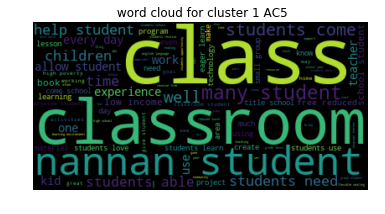

In [142]:
from wordcloud import WordCloud
essay_cluster1_ac5=" ".join(essa for essa in cluster1_AC5)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster1_ac5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1 AC5")
plt.show()

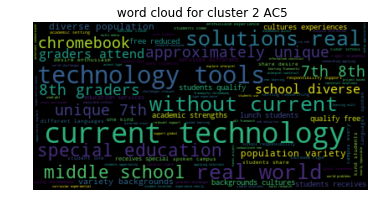

In [143]:
from wordcloud import WordCloud
essay_cluster2_ac5=" ".join(essa for essa in cluster2_AC5)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2_ac5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2 AC5")
plt.show()

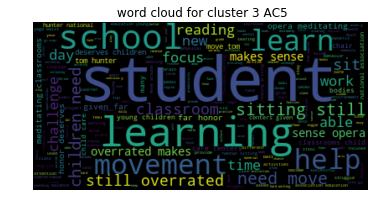

In [144]:
from wordcloud import WordCloud
essay_cluster3_ac5=" ".join(essa for essa in cluster3_AC5)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster3_ac5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 3 AC5")
plt.show()

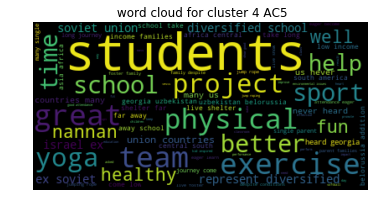

In [145]:
from wordcloud import WordCloud
essay_cluster4_ac5=" ".join(essa for essa in cluster4_AC5)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster4_ac5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 4 AC5")
plt.show()

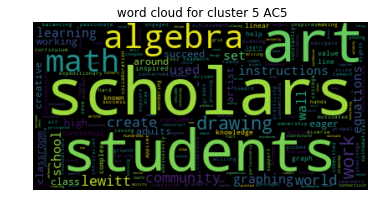

In [146]:
from wordcloud import WordCloud
essay_cluster5_ac5=" ".join(essa for essa in cluster5_AC5)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster5_ac5)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 5 AC5")
plt.show()

Inference:
We can see that when 5 clusters are considered , the maximum no of  points belong to cluster 1 with almost 99.75%.
in cluster 1 we can see most frequent words like class,student ,classroom ,nanan it means they mostly describe about the students and classroom details.
In cluster 2 we can see most frequent words like technology,tools ,current technology ,special edition which describes about the need for project funding.
In cluster 3 ,we can see the most frequent words like student,school,learning,need overrated etc which indicates the essence of project funding for the schoool.
In cluster 4 ,we see most important words like yoga ,exercises,physical ,better which indicateds the need for the physical activity in schools.
in cluster 5 we can see most frequent words like algebra,art ,math,scholars,drawing which belong to the extracurricular actitities as well as subjects to bne incorporated or stressed among students.
WE can alanyse the data better with increase in clusters.

<h2>2.7 Apply DBSCAN</h2>

#for 5k features we need to take 5k as min points and lap is unable to execute the command so we take bow vectror with mindif 1000 and max features as 50

In [49]:
# We are considering only the words which appeared in at least 1000 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_essay = CountVectorizer(min_df=1000)
vectorizer_bow_essay.fit(process_columns['preprocessed_essays'])

text_bow_db= vectorizer_bow_essay.transform(process_columns['preprocessed_essays'])

print("Shape of  matrix after one hot encodig ",text_bow_db.shape)

Shape of  matrix after one hot encodig  (109248, 1766)


In [50]:
#combining categorical  numerical ,project_title(BOW)  and preprocessed_essay (BOW)
set_db = hstack((cat_num, text_bow_db))

In [51]:
set_db.shape

(109248, 1874)

In [52]:
data=set_db.toarray()

In [58]:
# taking random 10k samples from the data
index = np.random.choice(109248, 10000, replace=False)
data_10k=data[index,:]
y_10k=Y[index]

In [62]:
data_10k.shape

(10000, 1874)

In [63]:
y_10k.shape

(10000,)

In [59]:
#credit to https://github.com/PushpendraSinghChauhan/Amazon-Fine-Food-Reviews/blob/master/Apply%20DBSCAN%20on%20Amazon%20Fine%20Food%20Reviews.ipynb
# function to determinethe distance of nth-nearest neighbour to all points in a multi-dimensional array
def n_neighbour(vectors , n):
    distance = []
    for point in vectors:
        temp = np.sort(np.sum((vectors-point)**2,axis=1),axis=None)
        distance.append(temp[n])
    return np.sqrt(np.array(distance))

In [60]:
# Function definition for implementing DBSCAN
def dbscan(epsilon, samples, Data):
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=samples, n_jobs=-1).fit(Data)
    
    # Number of clusters in labels, ignoring noise(-1) if present.
    n_clusters = len(set(db.labels_))
    print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(samples,epsilon,n_clusters))
    print("Labels(-1 is for Noise) : ",set(db.labels_))
    print()
    return db

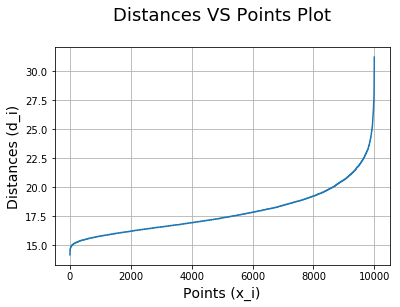

In [61]:
min_points = 1875

# Computing distances of nth-nearest neighbours
distances = n_neighbour(data_10k,min_points)
sorted_distance = np.sort(distances)
points = [i for i in range(data_10k.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

In [64]:
# Clustering with right epsilon
db1 = dbscan(18, min_points, data_10k)


# Clustering with  epsilon = 19
db2 = dbscan(19, min_points, data_10k) 


# Clustering with epsilon = 20
db3 = dbscan(20, min_points, data_10k)


# Clustering with epsilon = 21
db4 = dbscan(21, min_points, data_10k)

Number of clusters for MinPts = 1875 and Epsilon = 18.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 1875 and Epsilon = 19.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 1875 and Epsilon = 20.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 1875 and Epsilon = 21.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



In [65]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2).fit_transform(data_10k)

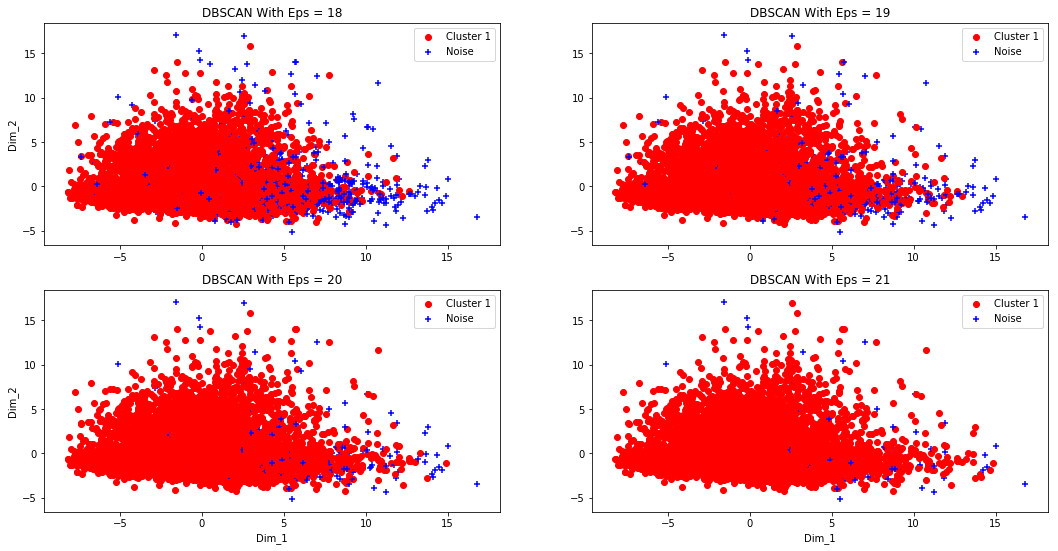

In [66]:
# Scatter plot for DBSCAN with Eps = 18
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 18')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps = 19
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 19')

# Scatter plot for DBSCAN with Eps = 20
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db3.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 20')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps = 21
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db4.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 21')
plt.xlabel('Dim_1')

plt.show()

# forming word cloud

# with epsilon value 18

In [69]:
essay_text = final_essay[index].values

# Getting all the reviews in different clusters
cluster1_DB = []
cluster2_DB = []

for i in range(db1.labels_.shape[0]):
    if db1.labels_[i] == 0:
        cluster1_DB.append(essay_text[i])
    else :
        cluster2_DB.append(essay_text[i])
 
        
# Number of reviews in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1_DB))
print("No. of essays in Cluster-2 : ",len(cluster2_DB))

No. of essays in Cluster-1 :  9299
No. of essays in Cluster-2 :  701


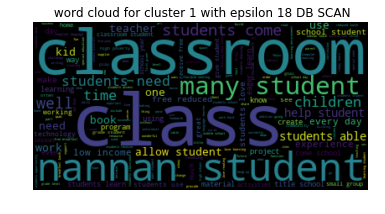

In [76]:
from wordcloud import WordCloud
essay_cluster1_DB=" ".join(essa for essa in cluster1_DB)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster1_DB)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1 with epsilon 18 DB SCAN")
plt.show()

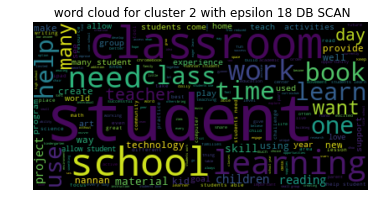

In [77]:
from wordcloud import WordCloud
essay_cluster2_DB=" ".join(essa for essa in cluster2_DB)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2_DB)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2 with epsilon 18 DB SCAN")
plt.show()

Inference:we could see most points belong to the cluster 1 which belong to corepoint cluster and consist of words like classroom,class ,student,many ,children and student interestly we got 701 out of 10k (7%)points who belong to noise cluster and consist of words like classroom, student, school .

We cannot consider this epsilon as the optimal value as it consist of more noise points .

# with epsilon value 19

In [72]:
essay_text = final_essay[index].values

# Getting all the reviews in different clusters
cluster1_DB2 = []
cluster2_DB2 = []

for i in range(db2.labels_.shape[0]):
    if db2.labels_[i] == 0:
        cluster1_DB2.append(essay_text[i])
    else :
        cluster2_DB2.append(essay_text[i])
 
 
# Number of reviews in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1_DB2))
print("No. of essays in Cluster-2 : ",len(cluster2_DB2))

No. of essays in Cluster-1 :  9644
No. of essays in Cluster-2 :  356


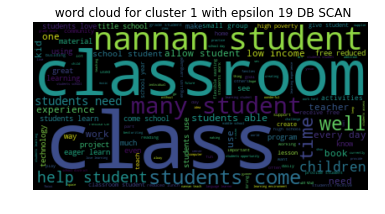

In [78]:
from wordcloud import WordCloud
essay_cluster1_DB2=" ".join(essa for essa in cluster1_DB2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster1_DB2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1 with epsilon 19 DB SCAN")
plt.show()

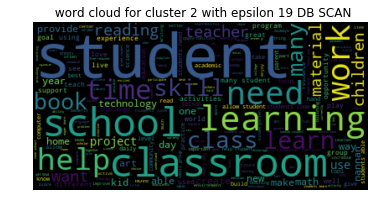

In [79]:
from wordcloud import WordCloud
essay_cluster2_DB2=" ".join(essa for essa in cluster2_DB2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2_DB2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2 with epsilon 19 DB SCAN")
plt.show()

Inference
Cluster 1 which is corepoint cluster consist words like classroom class nanan student etc 
cluster 2 which consist of noise points almost constitute 3.56% and consist words like student ,school,help,classroom and learning etc
WE see that as epsilon value increasing there is decrease in the noise points .

# with epsilon value 20

In [80]:
essay_text = final_essay[index].values

# Getting all the reviews in different clusters
cluster1_DB3 = []
cluster2_DB3 = []

for i in range(db3.labels_.shape[0]):
    if db3.labels_[i] == 0:
        cluster1_DB3.append(essay_text[i])
    else :
        cluster2_DB3.append(essay_text[i])
 
        
# Number of reviews in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1_DB3))
print("No. of essays in Cluster-2 : ",len(cluster2_DB3))

No. of essays in Cluster-1 :  9824
No. of essays in Cluster-2 :  176


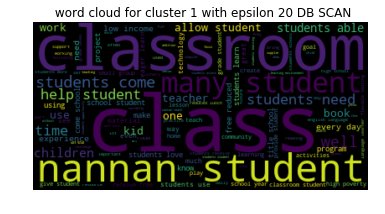

In [81]:
from wordcloud import WordCloud
essay_cluster1_DB3=" ".join(essa for essa in cluster1_DB3)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster1_DB3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1 with epsilon 20 DB SCAN")
plt.show()

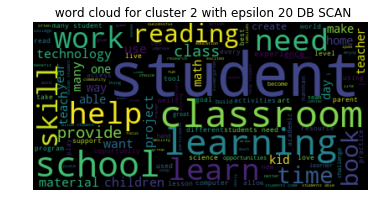

In [82]:
from wordcloud import WordCloud
essay_cluster2_DB3=" ".join(essa for essa in cluster2_DB3)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2_DB3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2 with epsilon 20 DB SCAN")
plt.show()

Inference
Cluster 1 which is corepoint cluster consist words like classroom class nanan student etc 
cluster 2 which consist of noise points almost constitute 1.76% and consist words like student ,school,help,classroom and learning etc
WE see that as epsilon value increasing there is decrease in the noise points .

# with epsilon value 21

In [83]:
essay_text = final_essay[index].values

# Getting all the reviews in different clusters
cluster1_DB4 = []
cluster2_DB4 = []

for i in range(db4.labels_.shape[0]):
    if db4.labels_[i] == 0:
        cluster1_DB4.append(essay_text[i])
    else :
        cluster2_DB4.append(essay_text[i])
 
        
# Number of reviews in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1_DB4))
print("No. of essays in Cluster-2 : ",len(cluster2_DB4))

No. of essays in Cluster-1 :  9923
No. of essays in Cluster-2 :  77


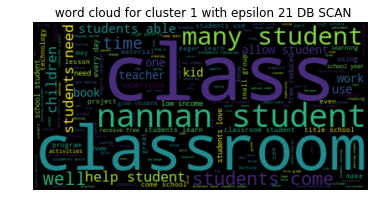

In [84]:
from wordcloud import WordCloud
essay_cluster1_DB4=" ".join(essa for essa in cluster1_DB4)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster1_DB4)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 1 with epsilon 21 DB SCAN")
plt.show()

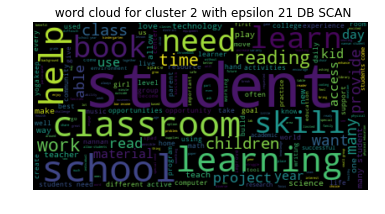

In [85]:
from wordcloud import WordCloud
essay_cluster2_DB4=" ".join(essa for essa in cluster2_DB4)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(essay_cluster2_DB4)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(" word cloud for cluster 2 with epsilon 21 DB SCAN")
plt.show()

Inference
Cluster 1 which is corepoint cluster consist words like classroom class nanan student etc 
cluster 2 which consist of noise points almost constitute 0.77% and consist words like student ,school,help,classroom and learning etc
WE see that as epsilon value increasing there is decrease in the noise points and this epsilon can be considered as the best value.

we can also infer that in all the clusters formed with different epsilons most of the words belong to same cluster like student belong to cluster 2 and class belong to cluster 1

# procedure followed

1 took all the categorical and numerical data along with essay bow and title bow of donorchose dataset
2 since we have 109248 data we have taken only 10k data points as our laptop has only 8gb ram and it is getting struck with even 30k points
3 for Kmeans and hierarchial we have converted the features to 5000 using select k best features and for db scan we have only considered bow vector with only 1766 features as to minimize the min points as we need to take atleast (D+1) points as the min minpoints .
4 K means

   plotted  (sse vs no of clusters ) and got 8 as the clusters and formed wordcloud for each cluster with essay text 
  
5 AgglomerativeClustering

  took 2 and 5 clusters and formed wordcloud for each cluster with essay text
  
6 DB scan 

  After taking only bow vector with 50 most important features we got total 158 features so considered  316 as the min points      and drawn plot with points on x axis and epsilon on y axis and got 11 as the best value 
  
  considered epsilon value 12,13 and 14 and formed wordcloud with each of these epsilon values and min points as 316 and         formed the essay text values.

# Conclusion

In [86]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["algorithm", "clusters formed ", "Max point cluster","no of points in max cluster"]

x.add_row(["K-Means", 8, 6, 6672])
x.add_row(["AgglomerativeClustering", 2, 1, 9994])
x.add_row(["AgglomerativeClustering", 5, 1, 9975])

x.add_row(["DBSCAN eps 18", 2, 1, 9229])
x.add_row(["DBSCAN eps 19", 2, 1, 9644])
x.add_row(["DBSCAN eps 20", 2, 1, 9824])
x.add_row(["DBSCAN eps 21", 2, 1, 9923])


print(x)


+-------------------------+------------------+-------------------+-----------------------------+
|        algorithm        | clusters formed  | Max point cluster | no of points in max cluster |
+-------------------------+------------------+-------------------+-----------------------------+
|         K-Means         |        8         |         6         |             6672            |
| AgglomerativeClustering |        2         |         1         |             9994            |
| AgglomerativeClustering |        5         |         1         |             9975            |
|      DBSCAN eps 18      |        2         |         1         |             9229            |
|      DBSCAN eps 19      |        2         |         1         |             9644            |
|      DBSCAN eps 20      |        2         |         1         |             9824            |
|      DBSCAN eps 21      |        2         |         1         |             9923            |
+-------------------------+---